# Illustrations for Isolation Forest algorithm

In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import IsolationForest
from sklearn.inspection import DecisionBoundaryDisplay

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
DPI = 300

In [4]:
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_context("talk")

In [5]:
palette = "blend:#009f06,white"

In [6]:
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0]

In [7]:
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)

In [8]:
offset = 3

In [9]:
X1 = 0.5 * np.random.randn(n_inliers) + offset
X2 = 0.5 * np.random.randn(n_inliers) - offset

In [10]:
outliers_1 = np.random.uniform(low=-6, high=6, size=(n_outliers))
outliers_2 = np.random.uniform(low=-6, high=6, size=(n_outliers))

In [11]:
data = pd.concat([pd.DataFrame({'попугаи': X1, 'удавы': X2}), pd.DataFrame({'попугаи': outliers_1, 'удавы': outliers_2})])

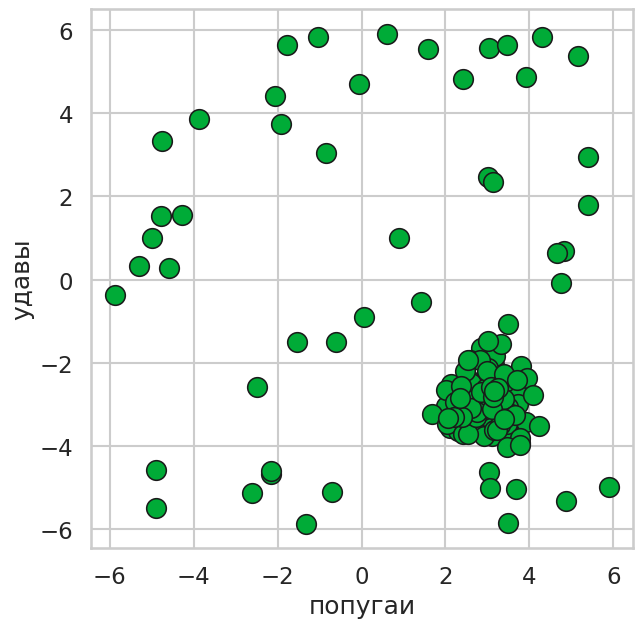

In [12]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data, x='попугаи', y='удавы', color='#00ab37', s=200, edgecolor='k')
plt.savefig("images/iforest_initial_data.png", transparent=True, dpi=DPI)

In [13]:
sample = data.sample(70).copy()

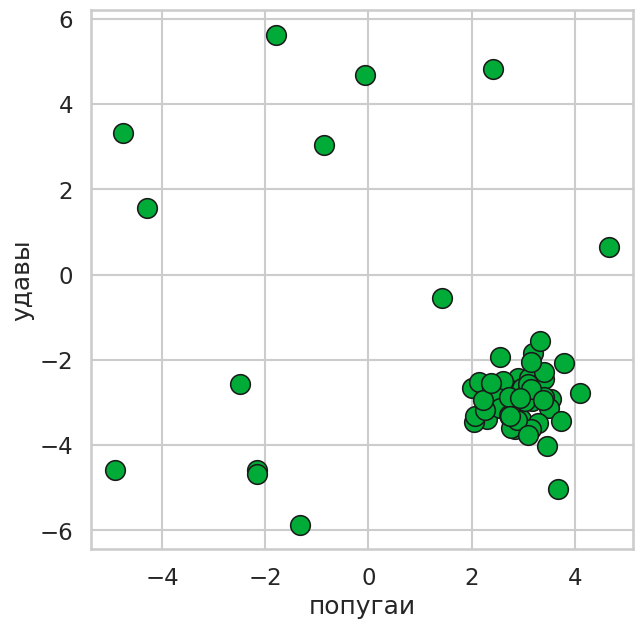

In [14]:
plt.figure(figsize=(7, 7))
sns.scatterplot(sample, x='попугаи', y='удавы', color='#00ab37', s=200, edgecolor='k')
plt.savefig("images/iforest_sample.png", transparent=True, dpi=DPI)

In [15]:
first_split = 3.954197818641566
second_split = -3.7345546743319455
third_split = 4.55352143693694

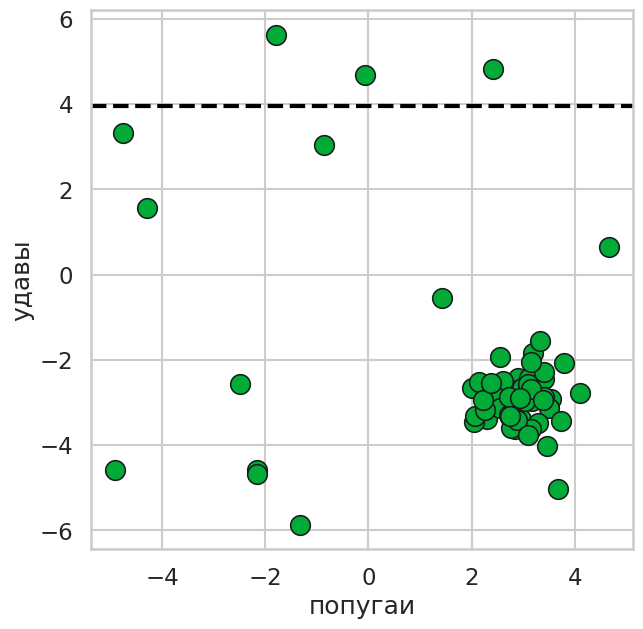

In [16]:
plt.figure(figsize=(7, 7))
sns.scatterplot(sample, x='попугаи', y='удавы', color='#00ab37', s=200, edgecolor='k')
plt.axhline(first_split, linestyle='--', color='black', linewidth=3)
plt.savefig("images/iforest_first_split.png", transparent=True, dpi=DPI)

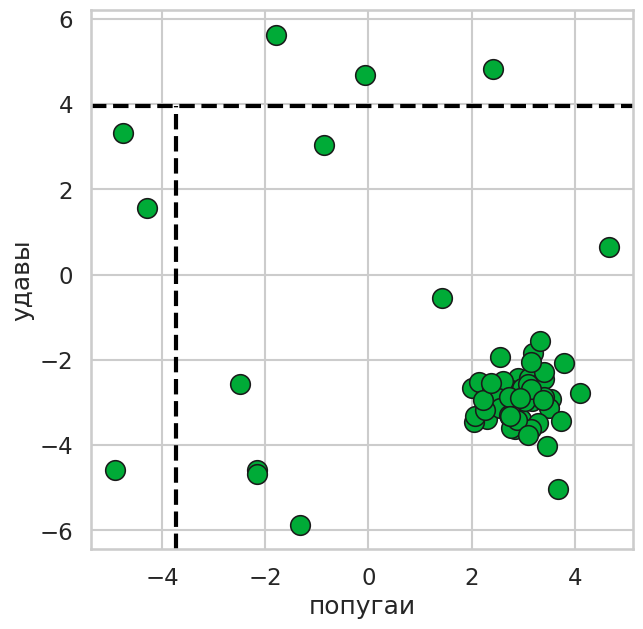

In [17]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(sample, x='попугаи', y='удавы', color='#00ab37', s=200, edgecolor='k')
bounds = ax.viewLim.bounds
plt.axhline(first_split, linestyle='--', color='black', linewidth=3)
plt.axvline(x=second_split, ymin = 0.0, ymax = - (bounds[1] -  first_split) / bounds[3], linestyle='--', color='black', linewidth=3)
plt.savefig("images/iforest_second_split.png", transparent=True, dpi=DPI)

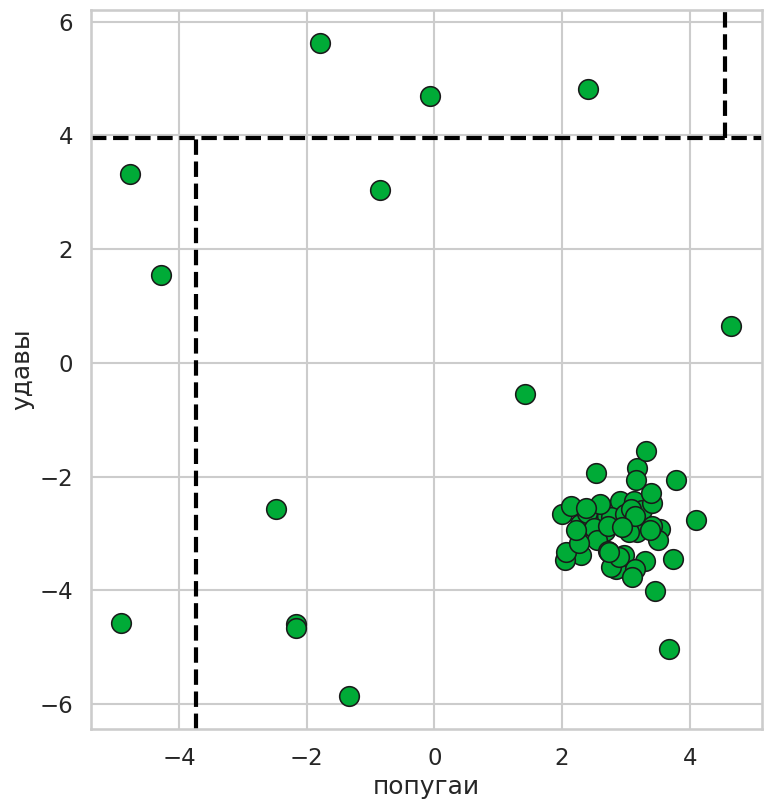

In [18]:
plt.figure(figsize=(4.33 * 2, 4.67 * 2))
ax = sns.scatterplot(sample, x='попугаи', y='удавы', color='#00ab37', s=200, edgecolor='k')
bounds = ax.viewLim.bounds
first_splot_pos = - (bounds[1] -  first_split) / bounds[3]
plt.axhline(first_split, linestyle='--', color='black', linewidth=3)
plt.axvline(x=second_split, ymin = 0.0, ymax = first_splot_pos, linestyle='--', color='black', linewidth=3)
plt.axvline(x=third_split, ymin = first_splot_pos, ymax = 1., linestyle='--', color='black', linewidth=3)
plt.savefig("images/iforest_third_split.png", transparent=True, dpi=DPI)

In [19]:
clf = IsolationForest(random_state=0)

In [20]:
clf.fit(data)

IsolationForest(random_state=0)

In [21]:
scores = - clf.score_samples(data) # negative scores to get anomaly score as in pyOD

/home/michael/git/phd-2025-anomaly-detection/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


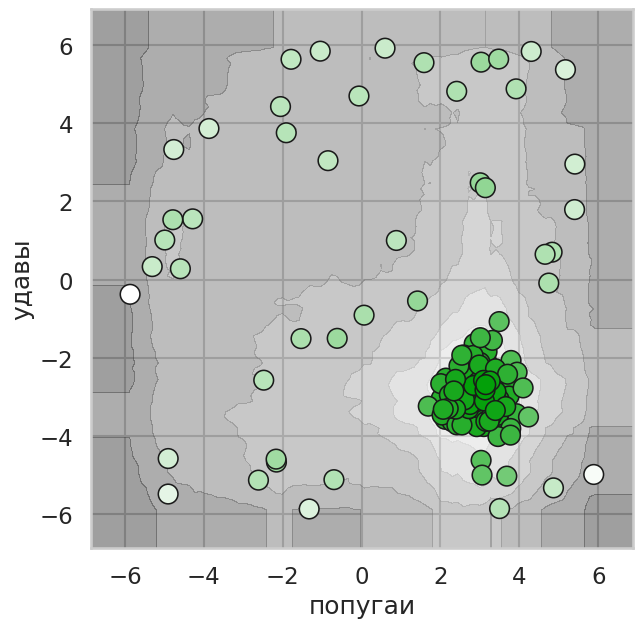

In [22]:
plt.figure(figsize=(7, 7))
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    data.values,
    plot_method='contourf',
    response_method="decision_function",
    alpha=0.4,
    ax=ax,
    cmap='Greys_r'
)
sns.scatterplot(data, x='попугаи', y='удавы', s=200, ax=ax, hue=scores, 
                palette=sns.color_palette(palette, as_cmap=True), legend=False, edgecolor='k')
plt.savefig("images/iforest_decision_boundary.png", transparent=True, dpi=DPI)

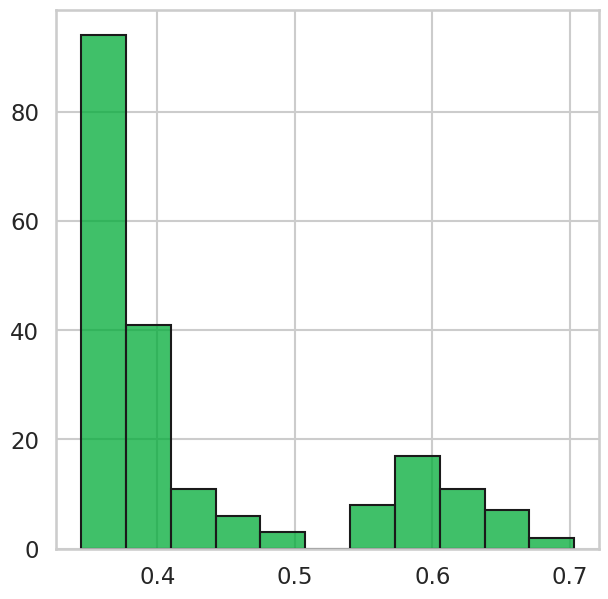

In [23]:
plt.figure(figsize=(7, 7))
ax = sns.histplot(scores, color='#00ab37', edgecolor='k')
ax.set(ylabel='')
plt.savefig("images/iforest_score_histogram.png", transparent=True, dpi=DPI)